In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import misc
import glob
import warnings
np.random.seed(1)
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
def load_mnist():
    # Loads the MNIST dataset from png images
 
    NUM_LABELS = 10        
    # create list of image objects
    test_images = []
    test_labels = []    
    
    for label in range(NUM_LABELS):
        for image_path in glob.glob("MNIST/Test/" + str(label) + "/*.png"):
            image = misc.imread(image_path)
            test_images.append(image)
            letter = [0 for _ in range(0,NUM_LABELS)]    
            letter[label] = 1
            test_labels.append(letter)  
            
    # create list of image objects
    train_images = []
    train_labels = []    
    
    for label in range(NUM_LABELS):
        for image_path in glob.glob("MNIST/Train/" + str(label) + "/*.png"):
            image = misc.imread(image_path)
            train_images.append(image)
            letter = [0 for _ in range(0,NUM_LABELS)]    
            letter[label] = 1
            train_labels.append(letter)                  
            
    X_train= np.array(train_images).reshape(-1,784)/255.0
    Y_train= np.array(train_labels)
    X_test= np.array(test_images).reshape(-1,784)/255.0
    Y_test= np.array(test_labels)
    
    return X_train, Y_train, X_test, Y_test

In [3]:
X_train, Y_train, X_test, Y_test = load_mnist()

In [21]:
def initialize(x_train,y_train):
    jsneural.std_gaussian = 0.01
    jsneural.alpha = -0.3
    jsneural.epoch = 5
    jsneural.batch_size = 100
    jsneural.counter = 0
    jsneural.n = x_train.shape[0]
    jsneural.iterations=int(jsneural.n/jsneural.batch_size) # automated - based on the batch size

In [112]:
class jsneural():
    Count = 0
    alpha = []
    std_gaussian = []
    epoch = []
    batch_size = []
    n = []
    iterations = []
    counter = 0
    np.random.seed(10)
    layers = {}
    cost = []
    cost_vector = []
    cost_test_vector = []
    acc_minibatch = []
    acc_test = []
    
    def __init__(self, input_x='False', output_y='False', n_nodes='False', activation='False'):
        self.x_train = input_x
        self.y_train = output_y
        self.n_nodes = n_nodes
        self.activation = activation
        self.w=[]
        self.b=[]
        self.dw=[]
        self.db=[]
        self.H_term=[]
        self.z=[]
        self.h=[]
        self.h_derivative=[]
        jsneural.layers.update({jsneural.Count:'layer'+str(jsneural.Count)}) # Create dictionary for each layer
        jsneural.Count += 1 # Every time a new object is defined
        
 ########## Random parameters for the network ############

    def add_random(self,x):
        if (self.activation == "softmax"): # Generate matrix from previous layer (n_nodes)
            #self.w = np.random.normal(size = ([eval('layer'+str(jsneural.Count-2)+'.n_nodes'),self.y_train.shape[1]]),loc=0,scale=jsneural.std_gaussian) 
            self.w = np.random.normal(size = ([eval(jsneural.layers[x]+'.n_nodes')
                                               ,self.y_train.shape[1]]),loc=0,scale=jsneural.std_gaussian) 
            self.b = np.zeros([self.y_train.shape[1]])
        else:
            #self.w = np.random.normal(size = ([eval('layer'+str(x)+'.n_nodes'),self.n_nodes]),loc=0,scale=jsneural.std_gaussian) 
            self.w = np.random.normal(size = ([eval(jsneural.layers[x]+'.n_nodes')
                                               ,self.n_nodes]),loc=0,scale=jsneural.std_gaussian) 
            self.b = np.zeros([self.n_nodes])
  
    def generate_parameters(): # Loop to generate parameters for all the systems
        for i in range(jsneural.Count-1):
            eval(jsneural.layers[i+1]+'.add_random('+str(i)+')') # Run over dictionary
            #print(eval(jsneural.layers[i+1]+'.w')) debug ok
            #eval('layer'+str(i+1)+'.add_random('+str(i)+')') debug ok
            
 ##################################################

    def forward(self,x):
        self.z = np.dot(x,self.w)+self.b
        self.h = jsneural.sigma(self.z,activation=self.activation)
        self.h_derivative = jsneural.activation_derivatives(self,activation=self.activation)
    
    def activation_derivatives(self,activation=False):
        if (self.activation == "sigmoid"):
            return self.h*(1-self.h) 
        elif (self.activation == "relu"):
            return np.where(np.maximum(0.0, self.h)>0,1,0)    
        else:
            return []
             
    def L_model_forward(x_minibatch):
        layer1.forward(x_minibatch)
        for i in range(jsneural.Count-2):
            eval('layer'+str(i+2)+'.forward(layer'+str(i+1)+'.h)')
    
    def update_parameters(self,dw,db):
        self.w+=alpha*dw
        self.b+=alpha*db
    
    def parameters(self):
        weight = self.w
        bias = self.b
        return weight,bias
    
    ## Activation functions
    def sigma(z_i,activation=False):
        if(activation==False):
            return print('Please choose an activation function')
        elif(activation=='sigmoid'):
            p_ik = 1/(1+np.exp(-z_i))
            return p_ik
        elif(activation=='softmax'):
            z_ik = np.exp(z_i)
            sum_row=np.sum(z_ik,axis=1).reshape(-1,1)
            p_ik=np.divide(z_ik,sum_row)
            return p_ik
        elif(activation=='relu'):
            p_ik = np.maximum(0.0,z_i)
            return p_ik
        
    def compute_cost(y_in,loss_function=False): # Calculate the loss and cost function using entering arrays
        if(loss_function==False):
            return print('Please choose a loss function')
        elif(loss_function=='cross_entropy'):
            h_in = eval(jsneural.layers[jsneural.Count-1]+'.h')
            nb = y_in.shape[0]
            loss_calc = -np.sum(y_in*np.log(h_in),axis=1)
            jsneural.cost = (1/nb)*np.sum(loss_calc)
            return jsneural.cost
    
    def softmax_backward(self,p_in,x_in,y_in):
        n_in = y_in.shape[0]
        self.H_term = p_in - y_in
        self.db = (1/n_in)*np.sum(self.H_term,axis=0)
        self.dw = (1/n_in)*np.dot(np.transpose(x_in),self.H_term) # vector dJ/dW_j to update w_j for softmax
    
    def linear_backward(self,j,n_in):
        #print(' activation =',self.activation,'; layer =',j) #debugged - passed attributes
        H_next_layer = eval(jsneural.layers[j+1]+'.H_term')
        w_next_layer = eval(jsneural.layers[j+1]+'.w')
        H_previous_layer = eval(jsneural.layers[j-1]+'.h')
        HwT = np.dot(H_next_layer,w_next_layer.T)
        self.H_term = np.multiply(self.h_derivative,HwT) # memorization of commom term to backpropagate
        self.db = (1/n_in)*np.sum(self.H_term,axis=0)
        self.dw = (1/n_in)*np.matmul(H_previous_layer.T,self.H_term)
        
    def L_model_backward(x_back,y_back):     
        layer0.h = x_back
        n_in = y_back.shape[0]
        h_L=eval(jsneural.layers[jsneural.Count-1]+'.h')
        h_L_previous=eval(jsneural.layers[jsneural.Count-2]+'.h')
        eval(jsneural.layers[jsneural.Count-1]+'.softmax_backward(h_L,h_L_previous,y_back)')
        
        for i in range(jsneural.Count-2,0,-1): # Generalization for all layers - ok
            eval(jsneural.layers[i]+'.linear_backward(i,n_in)') #
    
    def update_parameters(self):
        self.w += jsneural.alpha*self.dw
        self.b += jsneural.alpha*self.db
        
    def L_model_update_parameters():
        for k in range(jsneural.Count-1,0,-1):
            eval(jsneural.layers[k]+'.update_parameters()')
            
    def random_mini_batches(x_in,y_in):
        random_index = np.random.choice(x_in.shape[0],size = x_in.shape[0], replace= False)
        x_out = x_in[random_index]
        y_out = y_in[random_index]
        return x_out,y_out

    def train_L_layer_model(X_train,Y_train,loss_function=False):
        jsneural.counter=0
        for E in range(jsneural.epoch):
            X_train_minibatch,Y_train_minibatch = jsneural.random_mini_batches(X_train,Y_train)
            for i in range(jsneural.iterations):     
                x_loop = X_train_minibatch[i*jsneural.batch_size:(i+1)*jsneural.batch_size,:]
                y_loop = Y_train_minibatch[i*jsneural.batch_size:(i+1)*jsneural.batch_size,:]
                
                jsneural.L_model_forward(X_test)
                jsneural.compute_cost(Y_test,loss_function) # update jsneural.cost with test data
                jsneural.cost_test_vector.append(jsneural.cost)
                
                acc=jsneural.accuracy(Y_test)
                jsneural.acc_test.append(acc)
                
                jsneural.L_model_forward(x_loop)
                jsneural.compute_cost(y_loop,loss_function) # update jsneural.cost with mini-batch
                jsneural.cost_vector.append(jsneural.cost)
                
                acc=jsneural.accuracy(y_loop)
                jsneural.acc_minibatch.append(acc)
                
                jsneural.L_model_backward(x_loop,y_loop)
                jsneural.L_model_update_parameters()
                
                jsneural.counter+=1
            print('Epoch =',E,'; Cost Function =',jsneural.cost,'\n')
        print('Number of iterations = ',jsneural.counter)
        
    def accuracy(yy):
        h = eval('layer'+str(jsneural.Count-1)+'.h')
        h_max_acc = np.max(h,axis=1).reshape(-1,1)
        y_pred=np.where(h>=h_max_acc,1,0)
        acc = np.mean(y_pred == yy)
        return acc
       
    def update_layer(self, input_x='False', output_y='False', n_nodes='False', activation='False'):
        self.x_train = input_x
        self.y_train = output_y
        self.n_nodes = n_nodes
        self.activation = activation
        self.w=[]
        self.b=[]
        self.z=[]
        self.h=[]
        jsneural.layers.update({jsneural.Count:'layer'+str(jsneural.Count)}) # Create dictionary for each layer
        jsneural.Count = jsneural.Count

In [113]:
initialize(X_train,Y_train)
#print(n,alpha,epoch,batch_size,counter,iterations) # debug ok

In [114]:
layer0 = jsneural(input_x=X_train,n_nodes=784)

In [115]:
layer1 = jsneural(n_nodes=100,activation="sigmoid")

In [116]:
layer2 = jsneural(n_nodes=30,activation="relu")

In [117]:
layer3 = jsneural(output_y=Y_train,activation="softmax")

In [118]:
jsneural.generate_parameters()

In [119]:
jsneural.train_L_layer_model(X_train,Y_train,loss_function='cross_entropy')

Epoch = 0 ; Cost Function = 1.8239571863518027 

Epoch = 1 ; Cost Function = 0.3985549700978903 

Epoch = 2 ; Cost Function = 0.2934227643337694 

Epoch = 3 ; Cost Function = 0.16506258732371762 

Epoch = 4 ; Cost Function = 0.12288116592081023 

Number of iterations =  3000


In [196]:
x=np.linspace(1,jsneural.counter,jsneural.counter)

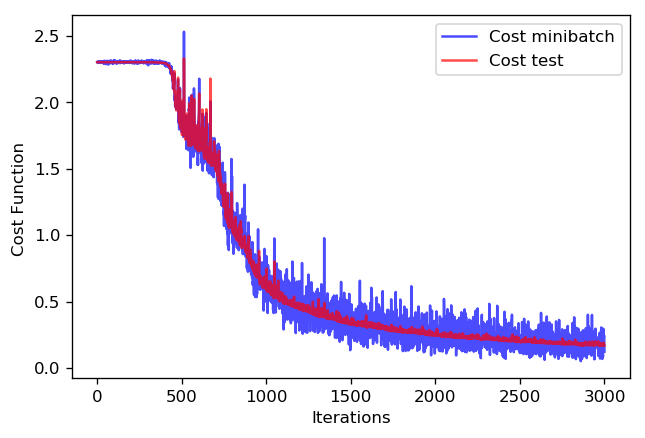

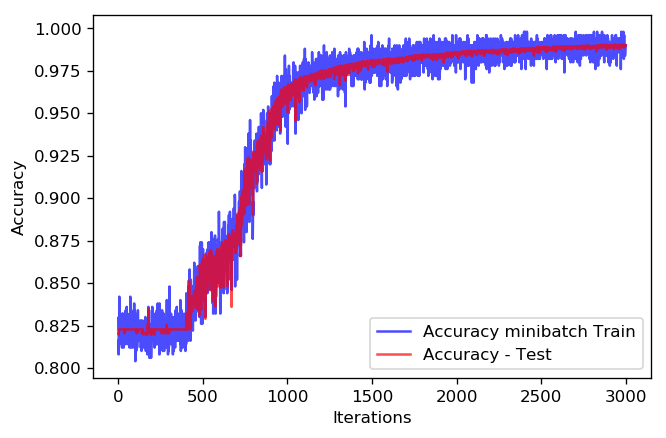

In [197]:
plt.figure(dpi=120)
#plt.subplot(1,2,3,dpi=120)
plt.plot(x,jsneural.cost_vector,c="b", alpha=0.7,label="Cost minibatch")
plt.plot(x,jsneural.cost_test_vector,c="r", alpha=0.7,label="Cost test")
plt.xlabel("Iterations")
plt.ylabel("Cost Function ")
plt.legend(loc='upper right')
#f2 = plt.subplot(2)
plt.figure(dpi=120)
plt.plot(x,jsneural.acc_minibatch,c="b",alpha=0.7,label="Accuracy minibatch Train")
plt.plot(x,jsneural.acc_test,c="r", alpha=0.7,label="Accuracy - Test")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.show()

In [198]:
def prediction_forward(xx,yy):
    z = np.dot(xx,layer1.w)+layer1.b
    h = jsneural.sigma(z,activation=layer1.activation)
    for k in range(jsneural.Count-2):
        w_layer = eval('layer'+str(k+2)+'.w')
        b_layer = eval('layer'+str(k+2)+'.b')
        act = eval('layer'+str(k+2)+'.activation')
        z = np.dot(h,w_layer)+b_layer
        h = jsneural.sigma(z,activation=act)
    h_max_acc = np.max(h,axis=1).reshape(-1,1)
    y_pred=np.where(h>=h_max_acc,1,0)
    acc = np.mean(y_pred == yy)
    return acc,y_pred

In [199]:
accuracy,y_pred=prediction_forward(X_test,Y_test)

In [200]:
accuracy

0.99006